# eksplorasi dan pembersihan data


In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Membaca data dari file CSV
data = pd.read_csv('Customers.csv')

# Menampilkan informasi awal mengenai data
print("info data ==== ", data.info())
print("describe data ==== ", data.describe())
print("head data ==== ", data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB
info data ====  None
describe data ====          CustomerID          Age  Annual Income ($)  Spending Score (1-100)  \
count  2000.000000  2000.000000        2000.000000             2000.000000   
mean   1000.500000    48.960000      110731.821500               50.962500   
std     577.494589    28.429747       45739.536

# pra pemrosesan data
## mengatasi nilai hilang dan mengubah data kategori


In [19]:
# Mengatasi nilai yang hilang atau null
data = data.dropna()

print(data["Gender"])
# Mengubah data kategori menjadi format numerik
data['Gender'] = data['Gender'].map({'Male': 0, 'Female' : 1})
print(data["Gender"])

# Membuat kolom profesi menjadi numerik dengan mengecek ada atau tidak nya profesi tersebut pada data dengan menggunakan one hot encoding
data = pd.get_dummies(data, columns=['Profession'])
print(data.head())


0         Male
1         Male
2       Female
3       Female
4       Female
         ...  
1995    Female
1996    Female
1997      Male
1998      Male
1999      Male
Name: Gender, Length: 1965, dtype: object
0       0
1       0
2       1
3       1
4       1
       ..
1995    1
1996    1
1997    0
1998    0
1999    0
Name: Gender, Length: 1965, dtype: int64
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1       0   19              15000                      39   
1           2       0   21              35000                      81   
2           3       1   20              86000                       6   
3           4       1   23              59000                      77   
4           5       1   31              38000                      40   

   Work Experience  Family Size  Profession_Artist  Profession_Doctor  \
0                1            4              False              False   
1                3            3              False       

## normalisasi dan standarisasi

In [20]:
from sklearn.preprocessing import StandardScaler

# memilih fitur yang digunakan untuk segmentasi pelanggan
features = ['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
features += [col for col in data.columns if col.startswith('Profession_')]

print(features)


#  normalisasi fitur
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[features])

print(data_scaled)

['Gender', 'Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size', 'Profession_Artist', 'Profession_Doctor', 'Profession_Engineer', 'Profession_Entertainment', 'Profession_Executive', 'Profession_Healthcare', 'Profession_Homemaker', 'Profession_Lawyer', 'Profession_Marketing']
[[-1.20802490e+00 -1.05234500e+00 -2.08667453e+00 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]
 [-1.20802490e+00 -9.81941450e-01 -1.65020484e+00 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]
 [ 8.27797508e-01 -1.01714323e+00 -5.37207112e-01 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]
 ...
 [-1.20802490e+00  1.34137577e+00 -4.28940804e-01 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]
 [-1.20802490e+00  9.89358008e-01  1.56022619e+00 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]
 [-1.20802490e+00  1.44698110e+00 -1.31151925e-04 ... -1.77471302e-01
  -2.79094217e-01 -2.12632937e-01]]


# pemilihan dan pelatihan model
## menentukan jumlah klaster dengan elbow method

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

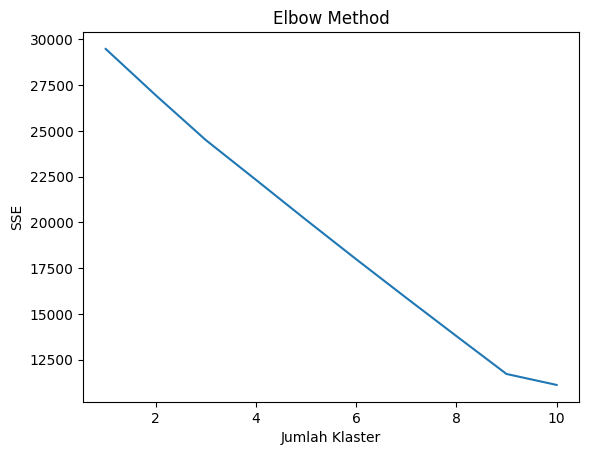

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# menetukan jumlah klaster dengan metode Elbow
sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(data_scaled)
  sse.append(kmeans.inertia_)


# membuat plot Elbow
plt.plot(range(1,11), sse)
plt.xlabel('Jumlah Klaster')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

## melatih model k-means dengan jumlah klaster optimal

In [25]:
optimal_klaster = 4
kmeans = KMeans(n_clusters=optimal_klaster, random_state=42)
data['cluster'] = kmeans.fit_predict(data_scaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


# Analisis dan interpretasi Segmen
## visualisasi segmen

In [27]:
# menampilkan rata-rata fitur untuk setiap segmen
klaster_analysis = data.groupby('cluster').mean()
print(klaster_analysis)

          CustomerID    Gender        Age  Annual Income ($)  \
cluster                                                        
0         994.034314  0.620915  49.004902      108776.580065   
1         970.876106  0.578171  47.843658      112574.041298   
2        1030.711377  0.583234  47.911377      111052.371257   
3         935.692737  0.575419  55.094972      111161.240223   

         Spending Score (1-100)  Work Experience  Family Size  \
cluster                                                         
0                     52.678105         4.215686     3.653595   
1                     50.516224         4.002950     3.905605   
2                     50.588024         4.068263     3.810778   
3                     48.966480         3.955307     3.581006   

         Profession_Artist  Profession_Doctor  Profession_Engineer  \
cluster                                                              
0                      1.0           0.000000                  0.0   
1             

## Visualisasi Segmen (PCA untuk reduksi dimensi )

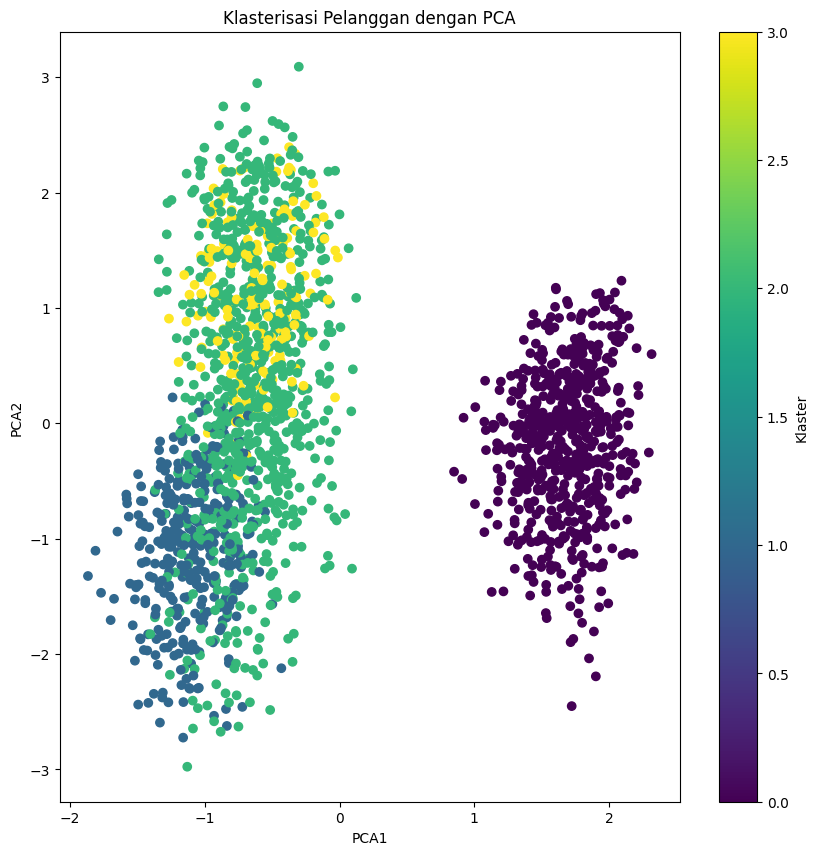

In [28]:
from sklearn.decomposition import PCA

# reduksi dimensi dengan PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)
data['PCA1'] = principal_components[:, 0]
data['PCA2'] = principal_components[:, 1]

# menampilkan hasil klasterisasi dengan PCA
plt.figure(figsize=(10,10))
plt.scatter(data['PCA1'], data['PCA2'], c=data['cluster'], cmap='viridis')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Klasterisasi Pelanggan dengan PCA')
plt.colorbar(label='Klaster')
plt.show()

In [41]:
def print_cluster_characteristics(data):
    for cluster in sorted(data['cluster'].unique()):
        cluster_data = data[data['cluster'] == cluster]
        print(f"Karakteristik Segmen {cluster}:\n")
        
        # Karakteristik Gender
        gender_counts = cluster_data['Gender'].value_counts(normalize=True) * 100
        gender_description = ', '.join([f"{'Male' if idx == 0 else 'Female'}: {val:.2f}%" for idx, val in gender_counts.items()])
        print(f"Gender: {gender_description}")

        # Karakteristik Age
        print(f"Age: {cluster_data['Age'].mean():.2f} tahun (rata-rata)")

        # Karakteristik Annual Income
        print(f"Annual Income: ${cluster_data['Annual Income ($)'].mean():.2f} (rata-rata)")

        # Karakteristik Spending Score
        print(f"Spending Score: {cluster_data['Spending Score (1-100)'].mean():.2f} (rata-rata)")

        # Karakteristik Profession
        profession_counts = cluster_data[[col for col in cluster_data.columns if col.startswith('Profession_')]].mean() * 100
        profession_description = ', '.join([f"{col.replace('Profession_', '')}: {val:.2f}%" for col, val in profession_counts.items()])
        print(f"Profession: {profession_description}")

        # Karakteristik Work Experience
        print(f"Work Experience: {cluster_data['Work Experience'].mean():.2f} tahun (rata-rata)")

        # Karakteristik Family Size
        print(f"Family Size: {cluster_data['Family Size'].mean():.2f} anggota keluarga (rata-rata)")

        print("\n")

# Mencetak karakteristik setiap segmen
print(data)
print_cluster_characteristics(data)


      CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0              1       0   19              15000                      39   
1              2       0   21              35000                      81   
2              3       1   20              86000                       6   
3              4       1   23              59000                      77   
4              5       1   31              38000                      40   
...          ...     ...  ...                ...                     ...   
1995        1996       1   71             184387                      40   
1996        1997       1   91              73158                      32   
1997        1998       0   87              90961                      14   
1998        1999       0   77             182109                       4   
1999        2000       0   90             110610                      52   

      Work Experience  Family Size  Profession_Artist  Profession_Doctor  \
0          

## visualisasi segmen karakteristik

/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/homebrew/lib/python3.11/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


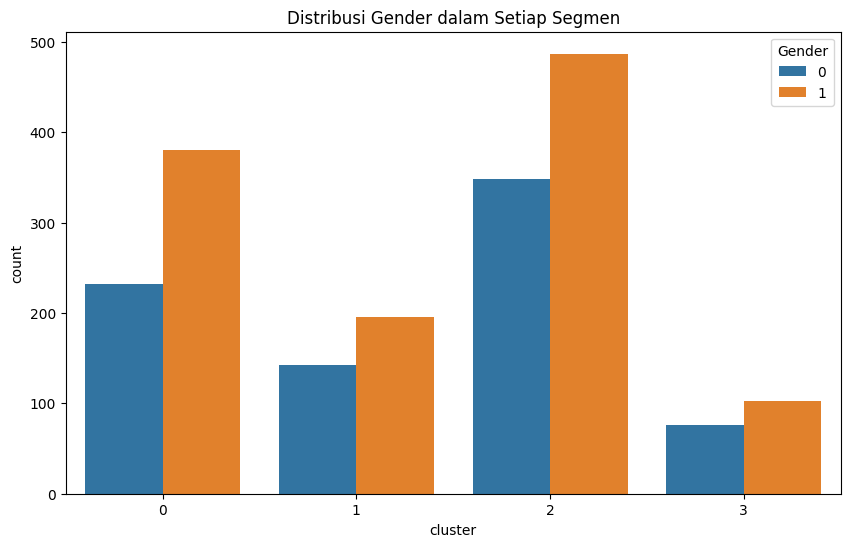

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


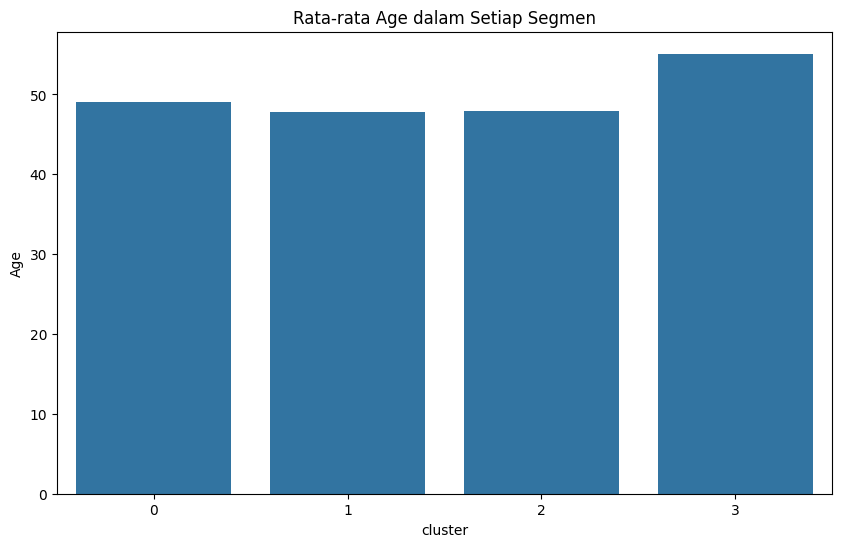

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


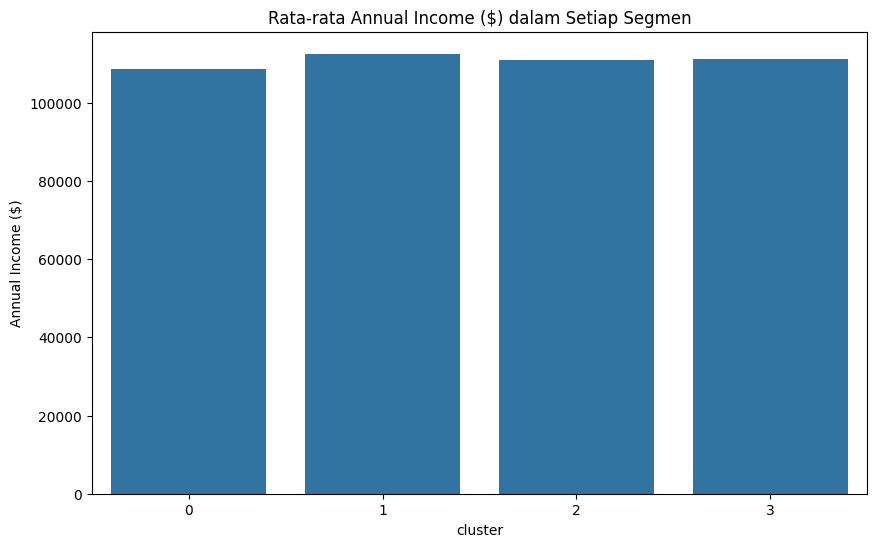

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


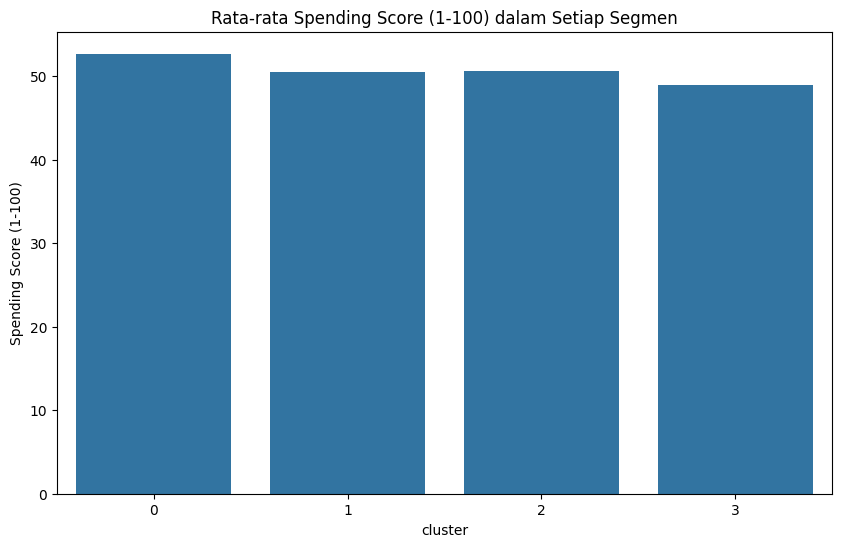

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


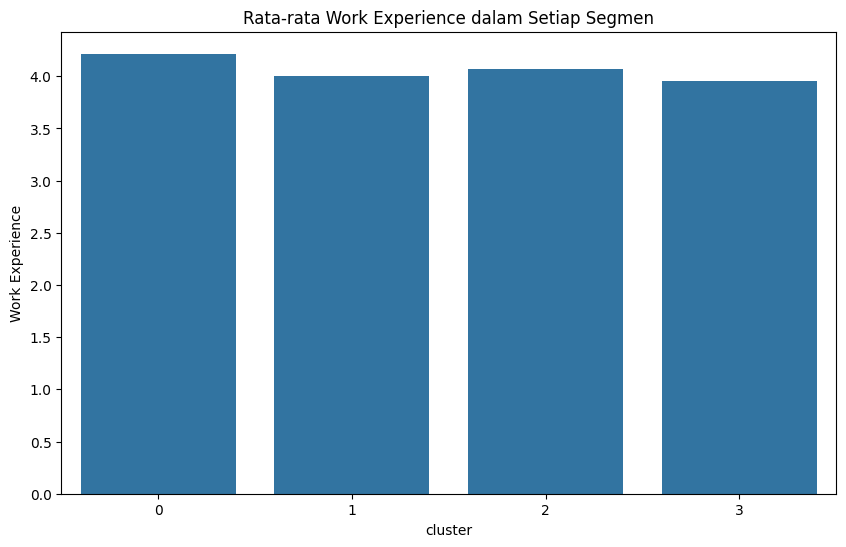

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


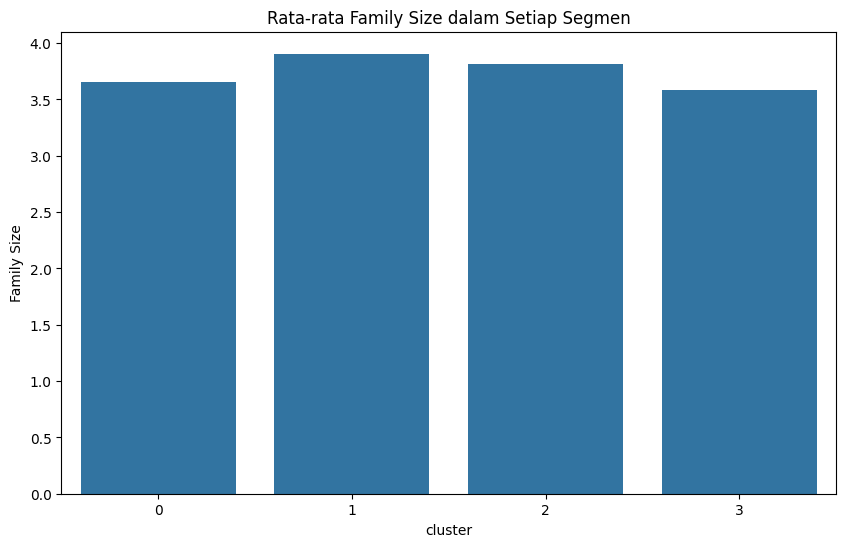

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


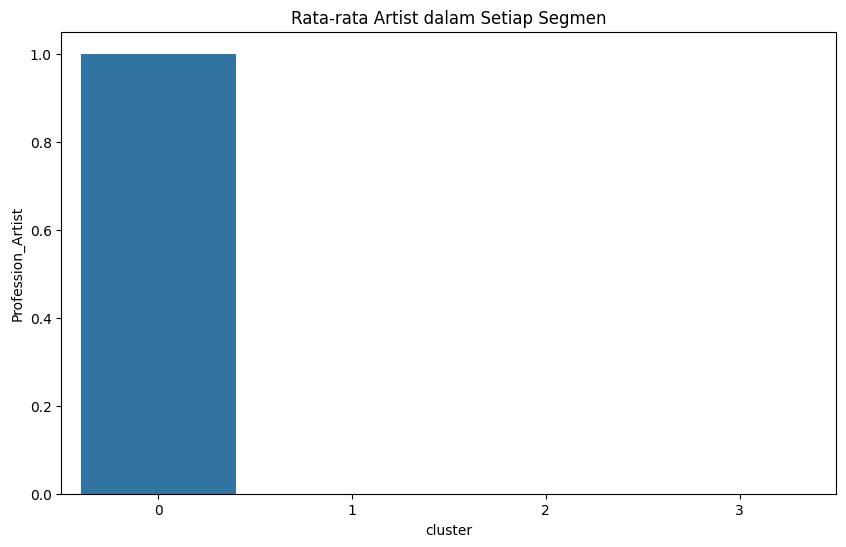

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


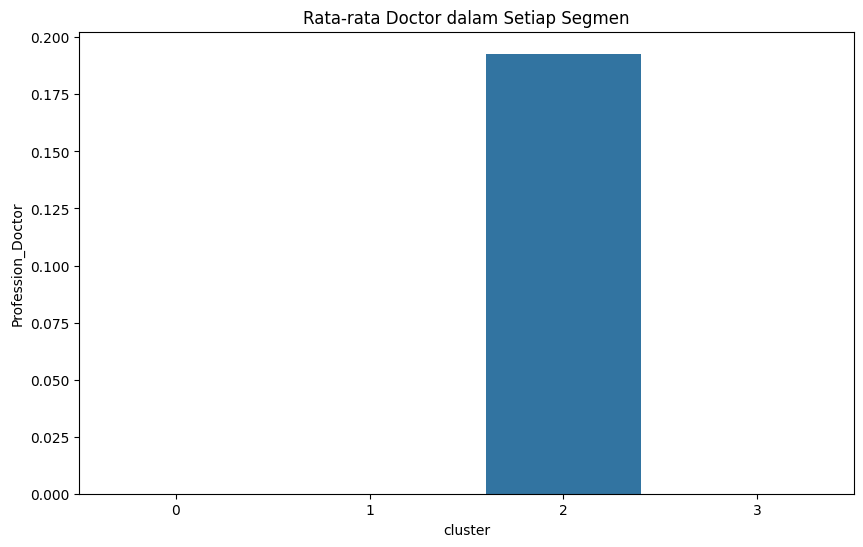

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


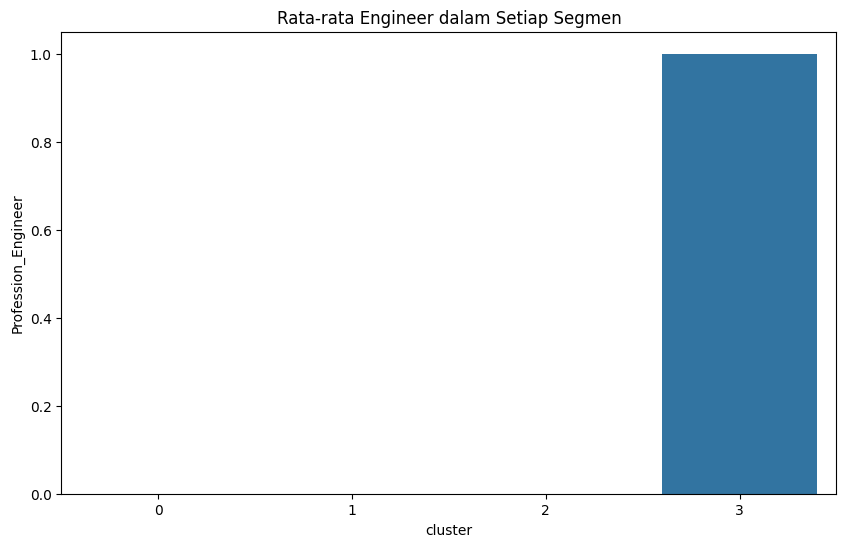

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


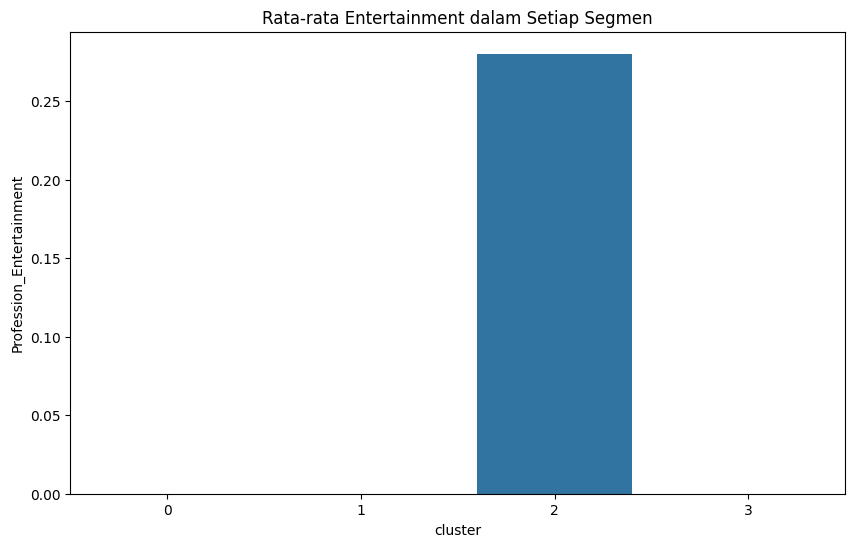

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


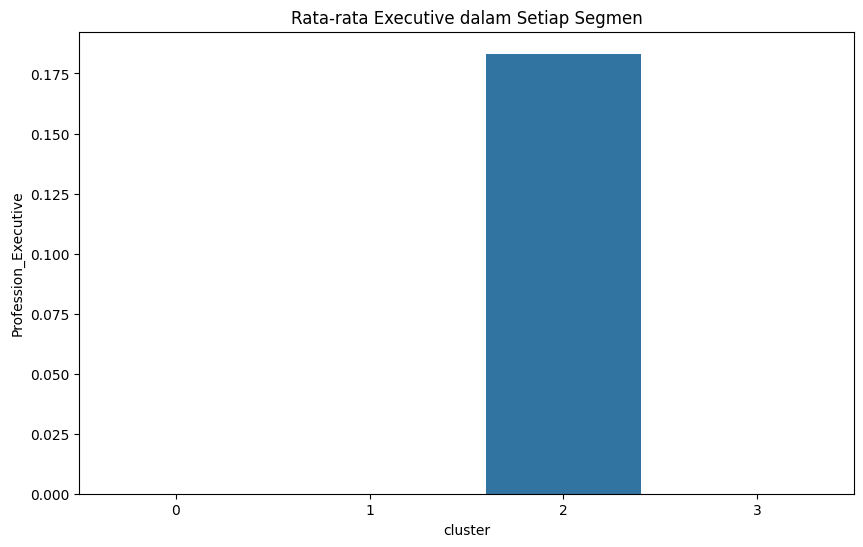

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


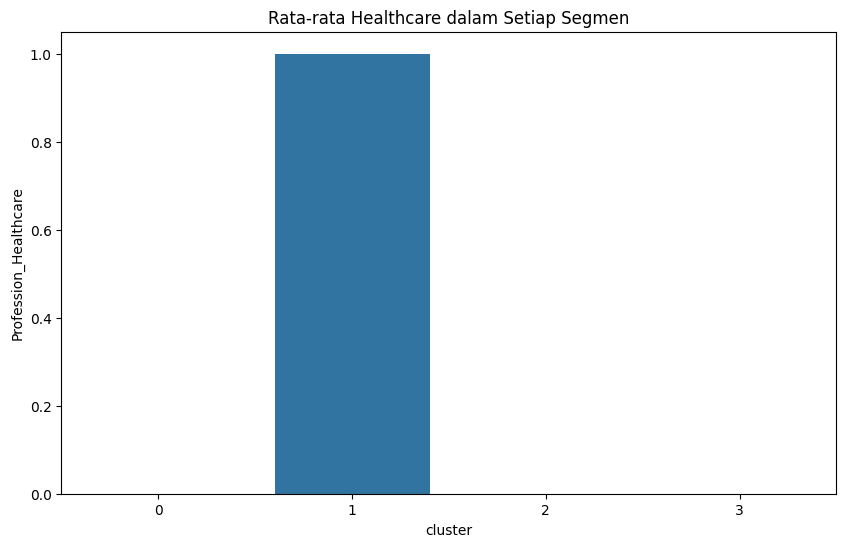

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


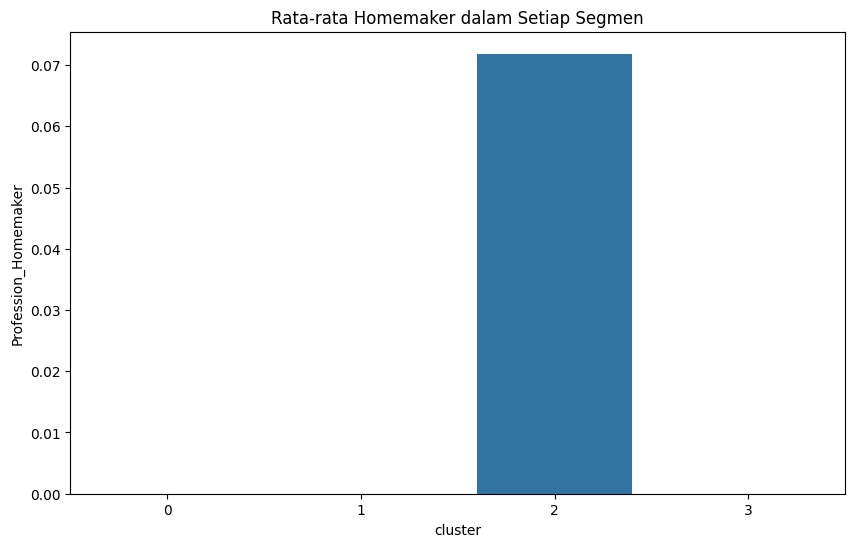

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


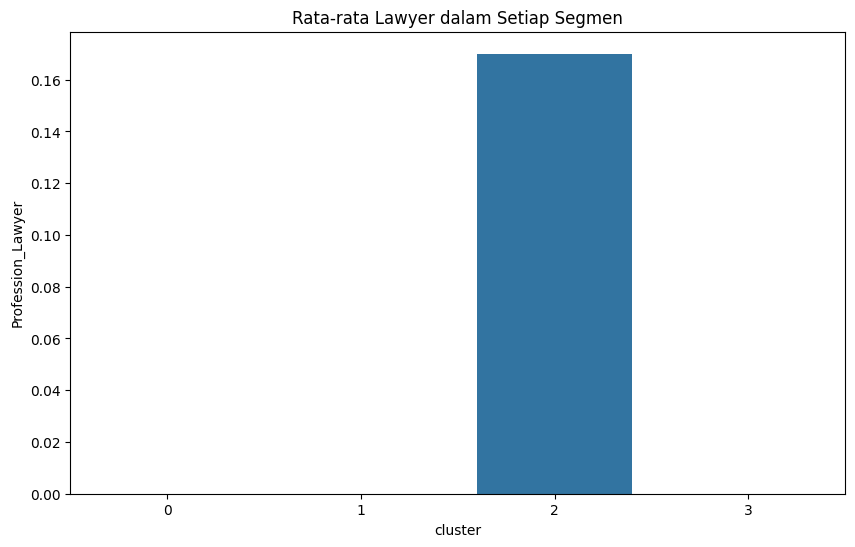

/var/folders/6q/ffg7m19151x7230qzrw1qgp40000gn/T/ipykernel_9721/3718796786.py:23: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='cluster', y=feature, ci=None)


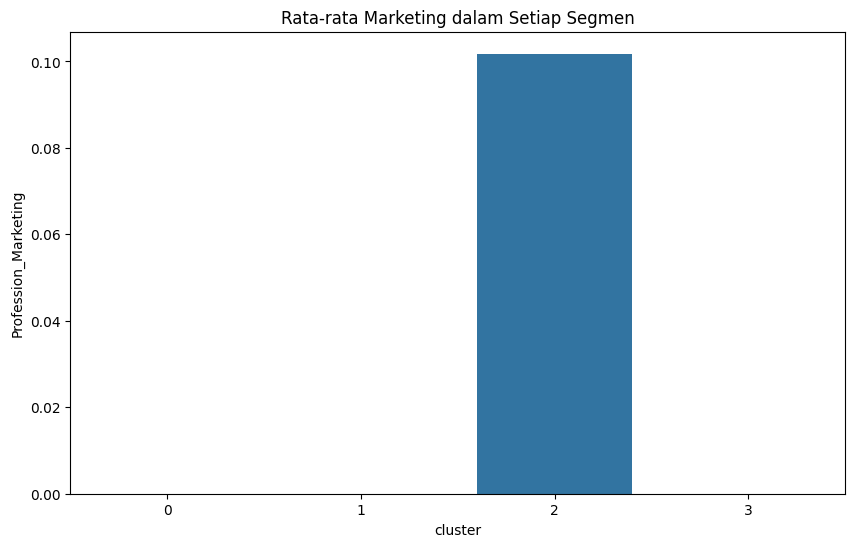

In [45]:
import seaborn as sns

# Visualisasi karakteristik segmen
def plot_cluster_characteristics(data):
    # Plot distribusi Gender dalam setiap segmen
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x='cluster', hue='Gender')
    plt.title('Distribusi Gender dalam Setiap Segmen')
    plt.show()

    # Plot rata-rata fitur dalam setiap segmen
    features_to_plot = ['Age', 'Annual Income ($)', 'Spending Score (1-100)', 'Work Experience', 'Family Size']
    for feature in features_to_plot:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x='cluster', y=feature, ci=None)
        plt.title(f'Rata-rata {feature} dalam Setiap Segmen')
        plt.show()

    # Plot distribusi Profession dalam setiap segmen
    profession_features = [col for col in data.columns if col.startswith('Profession_')]
    for feature in profession_features:
        plt.figure(figsize=(10, 6))
        sns.barplot(data=data, x='cluster', y=feature, ci=None)
        plt.title(f'Rata-rata {feature.replace("Profession_", "")} dalam Setiap Segmen')
        plt.show()

plot_cluster_characteristics(data)

# menyimpan model yang dilatih

In [29]:
import joblib

# Menyimpan model K-Means
joblib.dump(kmeans, 'kmeans_model.pkl')

# Menyimpan scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# memuat model yang disimpan

In [30]:
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

# Membuat data baru

In [32]:
import pandas as pd

def preprocess_and_segment(new_data):
    # Mengatasi nilai hilang dan transformasi yang diperlukan
    new_data['Gender'] = new_data['Gender'].map({'Male': 0, 'Female': 1})
    new_data = pd.get_dummies(new_data, columns=['Profession'])
    
    # Pastikan kolom yang sesuai tersedia
    for col in features:
        if col not in new_data.columns:
            new_data[col] = 0  # Tambahkan kolom yang hilang dengan nilai default
    
    # Normalisasi data
    new_data_scaled = scaler.transform(new_data[features])
    
    # Segmentasi data menggunakan model K-Means
    clusters = kmeans.predict(new_data_scaled)
    
    # Mengembalikan hasil segmentasi
    new_data['cluster'] = clusters
    return new_data

# Data pelanggan baru sebagai input
new_customer_data = pd.DataFrame({
    'CustomerID': [101, 102],
    'Gender': ['Female', 'Male'],
    'Age': [28, 45],
    'AnnualIncome': [65000, 80000],
    'SpendingScore': [55, 35],
    'Profession': ['Teacher', 'Engineer'],
    'WorkExperience': [5, 20],
    'FamilySize': [3, 4]
})

# Memproses dan mengelompokkan data pelanggan baru
segmented_customers = preprocess_and_segment(new_customer_data)
print(segmented_customers)

   CustomerID  Gender  Age  AnnualIncome  SpendingScore  WorkExperience  \
0         101       1   28         65000             55               5   
1         102       0   45         80000             35              20   

   FamilySize  Profession_Engineer  Profession_Teacher  Annual Income ($)  \
0           3                False                True                  0   
1           4                 True               False                  0   

   ...  Family Size  Profession_Artist  Profession_Doctor  \
0  ...            0                  0                  0   
1  ...            0                  0                  0   

   Profession_Entertainment  Profession_Executive  Profession_Healthcare  \
0                         0                     0                      0   
1                         0                     0                      0   

   Profession_Homemaker  Profession_Lawyer  Profession_Marketing  cluster  
0                     0                  0           

# Integrasi ke dalam Sistem Bisnis

## menggunakan API untuk real time processing

In [35]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

app = Flask(__name__)

# Memuat model dan scaler yang telah disimpan
kmeans = joblib.load('kmeans_model.pkl')
scaler = joblib.load('scaler.pkl')

features = ['Gender', 'Age', 'AnnualIncome', 'SpendingScore', 'WorkExperience', 'FamilySize']
features += [f'Profession_{profession}' for profession in ['Engineer', 'Doctor', 'Artist', 'Lawyer', 'Teacher']]  # Daftar profesi yang sesuai dengan model

def preprocess_and_segment(new_data):
    new_data['Gender'] = new_data['Gender'].map({'Male': 0, 'Female': 1})
    new_data = pd.get_dummies(new_data, columns=['Profession'])

    for col in features:
        if col not in new_data.columns:
            new_data[col] = 0
    
    new_data_scaled = scaler.transform(new_data[features])
    clusters = kmeans.predict(new_data_scaled)
    new_data['Cluster'] = clusters
    return new_data

@app.route('/segment', methods=['POST'])
def segment_customers():
    customer_data = request.json
    customer_df = pd.DataFrame(customer_data)
    segmented_customers = preprocess_and_segment(customer_df)
    return jsonify(segmented_customers.to_dict(orient='records'))

if __name__ == '__main__':
    app.run(debug=True, port=3000)  # Mengubah port ke 3000


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:3000
Press CTRL+C to quit
 * Restarting with stat
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/homebrew/lib/python3.11/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/homebrew/lib/python3.11/site-packages/traitlets/config/application.py", line 1052, in launch_instance
    app.initialize(argv)
  File "/opt/homebrew/lib/python3.11/site-packages/traitlets/config/application.py", line 117, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/homebrew/l

SystemExit: 1